In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img = cv2.imread('/content/sample_data/00-puppy.jpg')
img

array([[[78, 81, 95],
        [80, 83, 97],
        [81, 84, 98],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [79, 82, 96],
        [79, 82, 96],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       [[78, 81, 95],
        [77, 80, 94],
        [77, 80, 94],
        ...,
        [22, 27, 25],
        [22, 27, 25],
        [22, 27, 25]],

       ...,

       [[20, 29, 19],
        [21, 30, 20],
        [21, 30, 20],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [21, 30, 20],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]],

       [[21, 30, 20],
        [20, 29, 19],
        [20, 29, 19],
        ...,
        [22, 30, 23],
        [23, 31, 24],
        [23, 31, 24]]], dtype=uint8)

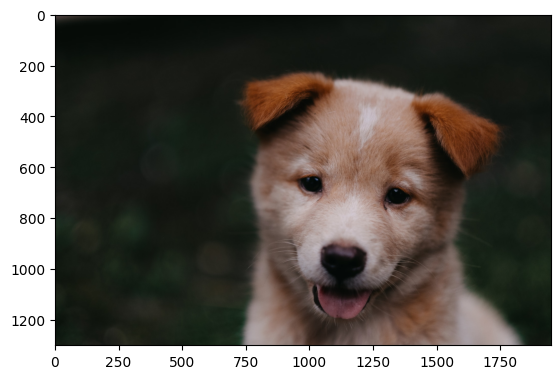

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

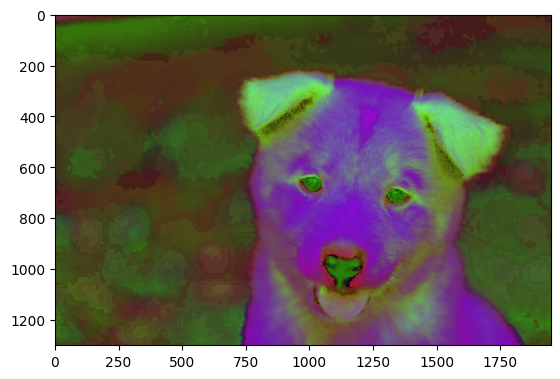

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(img)

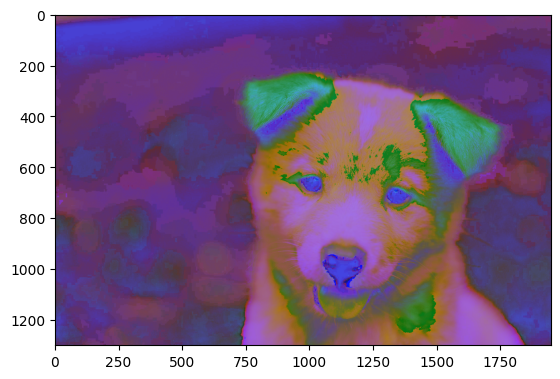

In [5]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
plt.imshow(img)

Blending and Pasting Images on top of each other

In [6]:
# new_pixel = a x pixel_1 + b x pixel_2 + y

import cv2

In [7]:
img1 = cv2.imread('/content/sample_data/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/sample_data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

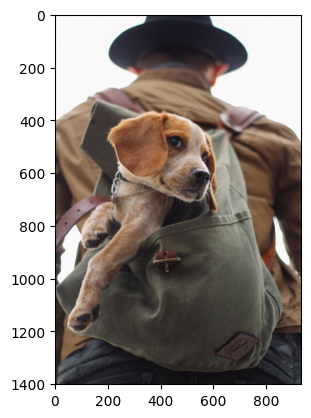

In [9]:
plt.imshow(img1)

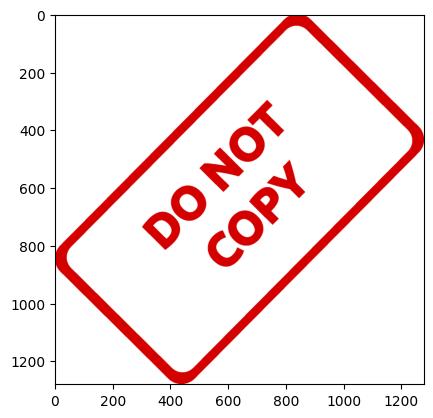

In [10]:
plt.imshow(img2)

In [11]:
#Blending images of same size
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

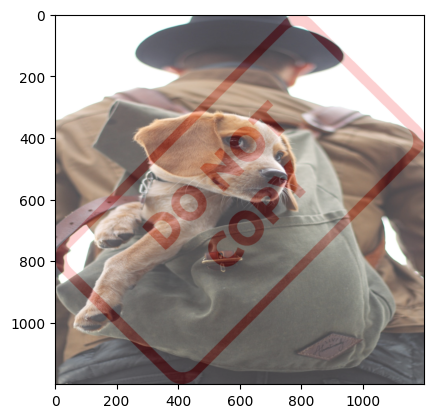

In [14]:
blended = cv2.addWeighted(src1 = img1, alpha=0.8, src2=img2, beta=0.2, gamma=10)
plt.imshow(blended)

In [15]:
#overlay a small image on top of a large image ( no blending)
#numpy reassignment


In [16]:
img1 = cv2.imread('/content/sample_data/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/sample_data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [17]:
img2 = cv2.resize(img2,(600,600))

In [18]:
large_img = img1
small_img = img2

In [19]:
x_offset = 0
y_offset = 0

In [20]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

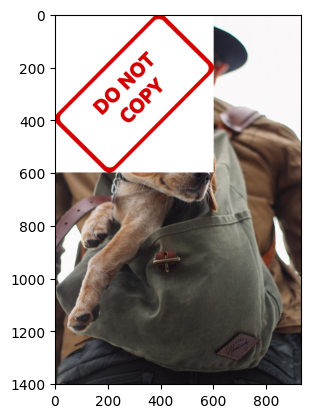

In [21]:
large_img[y_offset:y_end,x_offset:x_end] = small_img
plt.imshow(large_img)

In [22]:
#Blending images of different sizes

In [23]:
img1 = cv2.imread('/content/sample_data/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/sample_data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

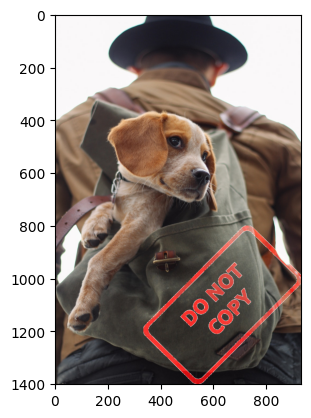

In [25]:
x_offset = 934-600
y_offset = 1401-600
rows,cols,channels = img2.shape
roi = img1[y_offset:1401,x_offset:943]
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(img2gray) #inverse color
white_background = np.full(img2.shape,255,dtype=np.uint8)
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
final_roi = cv2.bitwise_or(roi,fg)
large_img = img1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

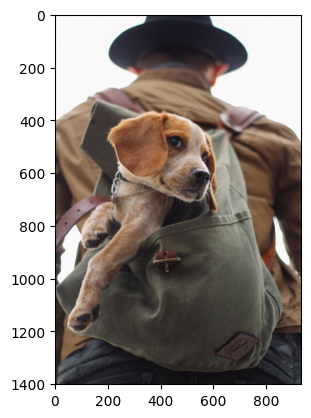

In [24]:
plt.imshow(img1)

In [26]:
#Image Theresholding = It is fundamentally a very simple method of segmenting an
#image into different parts. Thresholding will convert an image to consist of only two values, white of black

In [29]:
img = cv2.imread('/content/sample_data/rainbow.jpg',0)

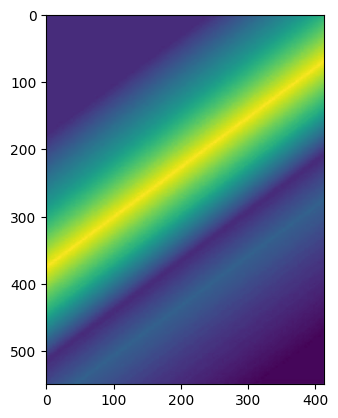

In [30]:
plt.imshow(img)

In [31]:
ret,thresh1 = cv2.threshold(img,np.round(255/2,0),255,cv2.THRESH_BINARY)

In [32]:
ret

128.0

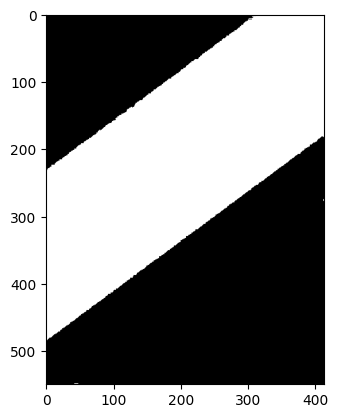

In [33]:
plt.imshow(thresh1,cmap='gray')

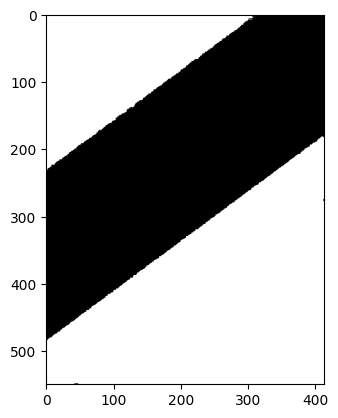

In [34]:
ret,thresh1 = cv2.threshold(img,np.round(255/2,0),255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh1,cmap='gray')

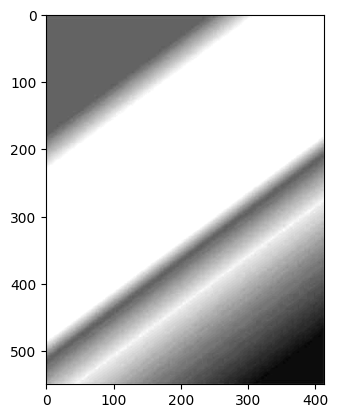

In [35]:
ret,thresh1 = cv2.threshold(img,np.round(255/2,0),255,cv2.THRESH_TRUNC)
plt.imshow(thresh1,cmap='gray')

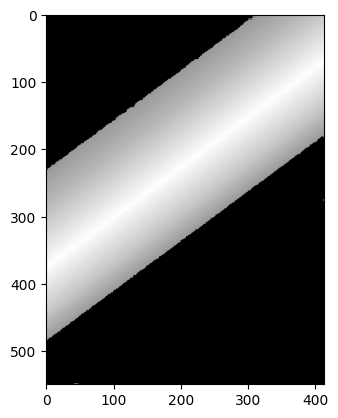

In [36]:
ret,thresh1 = cv2.threshold(img,np.round(255/2,0),255,cv2.THRESH_TOZERO)
plt.imshow(thresh1,cmap='gray')

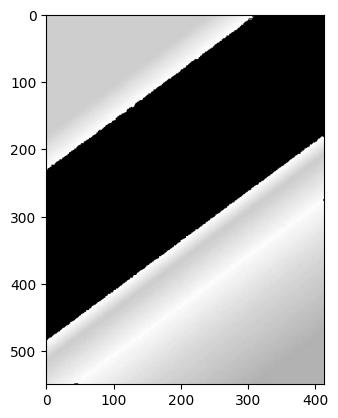

In [37]:
ret,thresh1 = cv2.threshold(img,np.round(255/2,0),255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh1,cmap='gray')

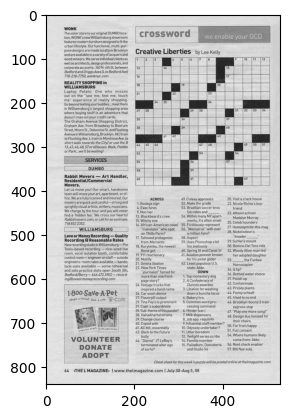

In [38]:
img = cv2.imread('/content/sample_data/crossword.jpg',0)
plt.imshow(img,cmap='gray')


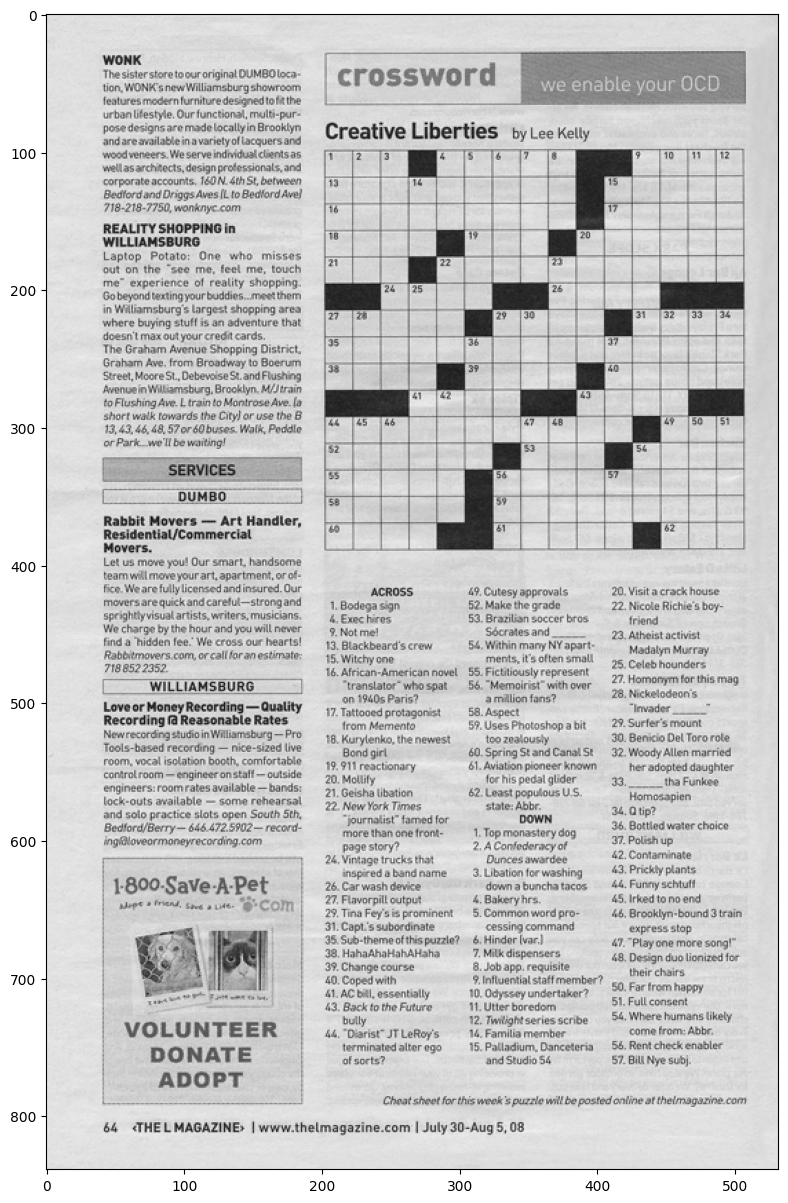

In [39]:
def show_pic(img):
  fig = plt.figure(figsize=(15,15))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

show_pic(img)

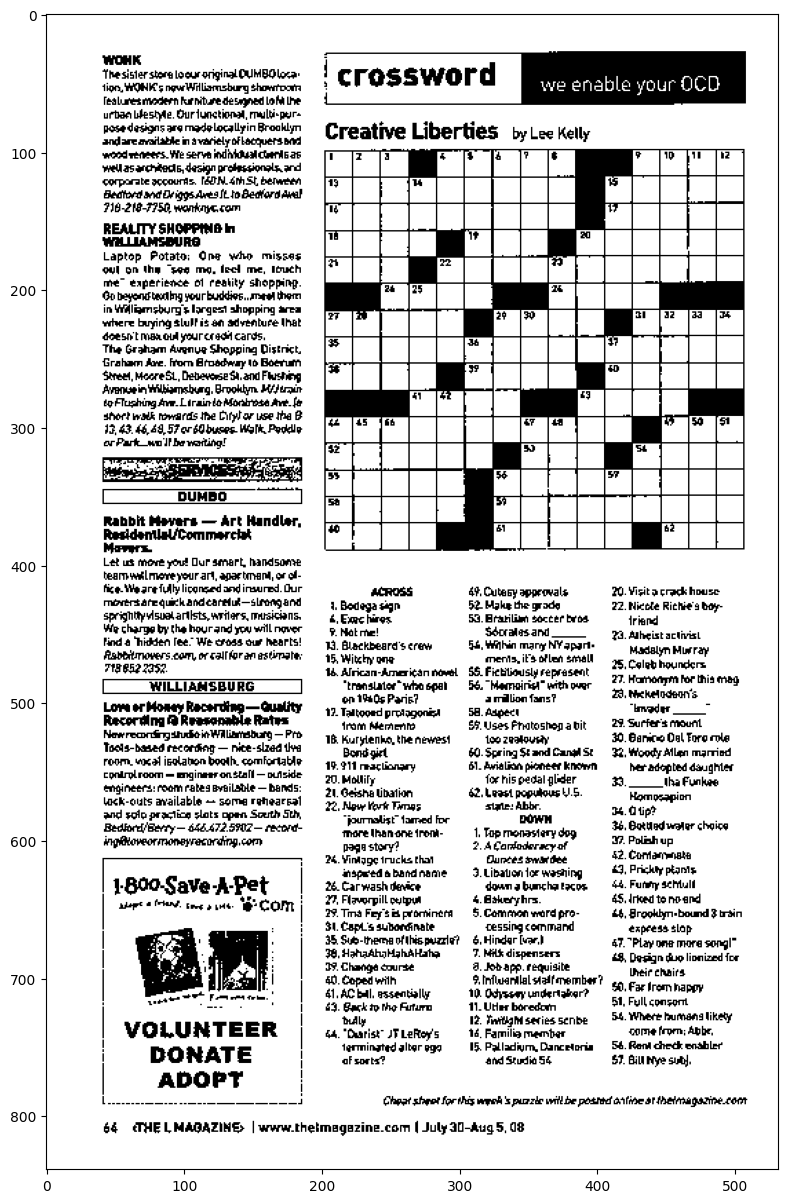

In [43]:
ret,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
show_pic(th1)

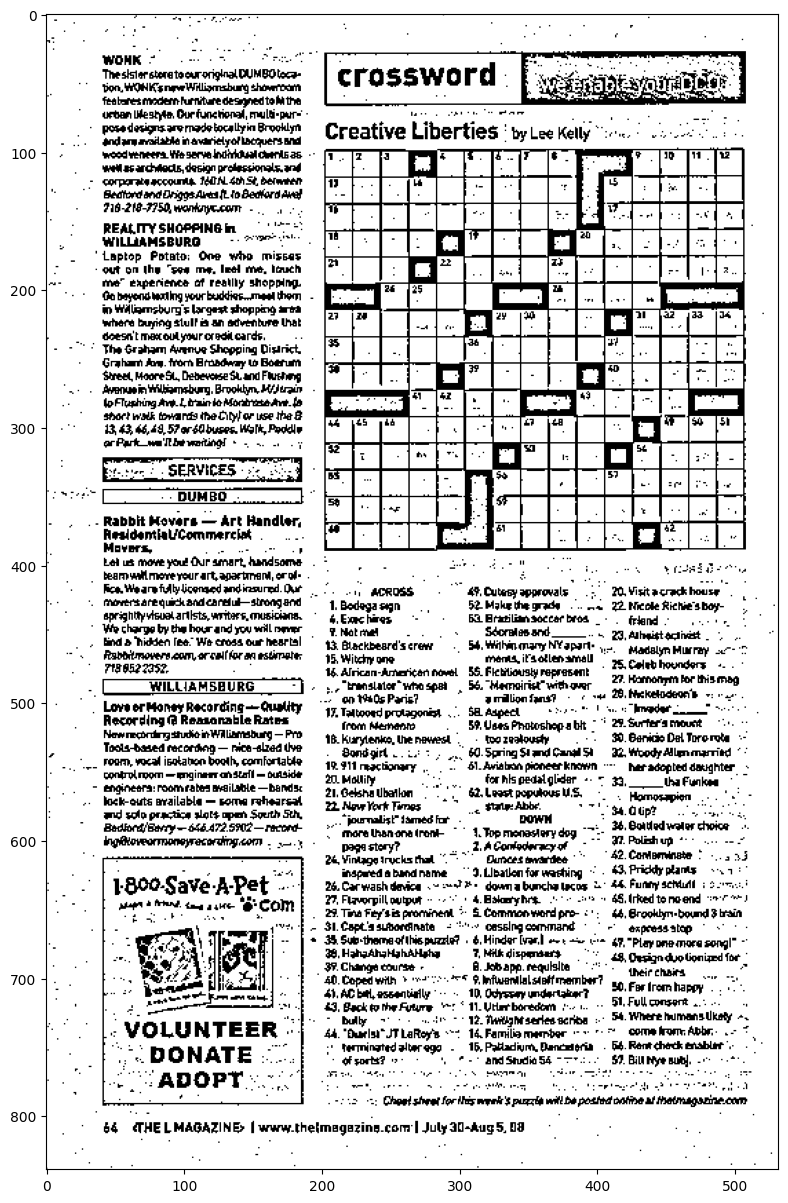

In [44]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)
show_pic(th2)

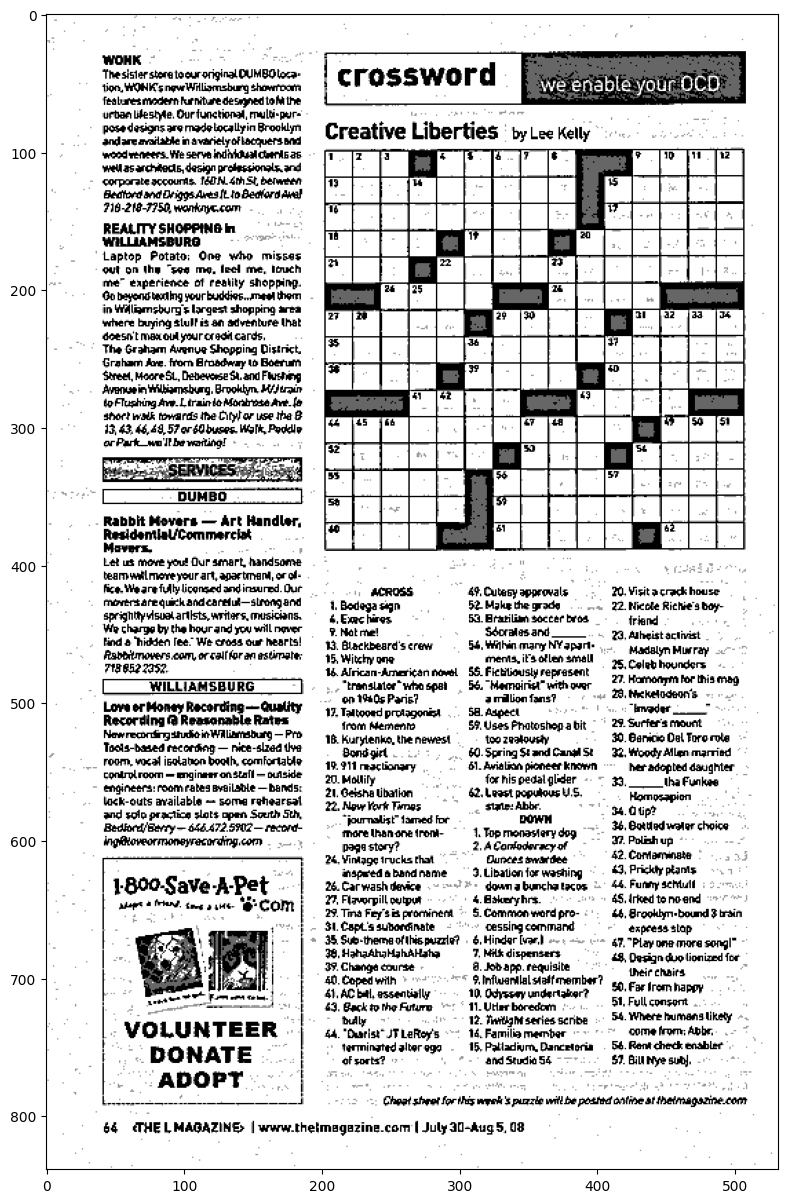

In [45]:
blended = cv2.addWeighted(src1 = th1,alpha=0.6, src2=th2,beta=0.4,gamma=0)
show_pic(blended)